In [1]:
import pandas as pd

import numpy as np
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df=pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Data Observation

In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
# Dependent - Class
# Independent - Time, Amount

continuous_columns = ["Time", 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', "Amount"]
category_columns = ["Class"]

#Supervised Classification

In [11]:
df.duplicated().sum()

1081

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.Class.value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

We can see the data is imbalance so now we are going to balance the dat

**Hypothesis testing / Statistical analysis**

In [14]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [15]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,Time,94811.077600,92005.592000,H0-There is no significant difference,-1.687004,0.091630
1,V1,0.005917,0.062920,H0-There is no significant difference,0.737190,0.461022
2,V2,-0.004135,-0.035459,H0-There is no significant difference,-1.256103,0.209104
3,V3,0.001613,0.021757,H0-There is no significant difference,0.189207,0.849934
4,V4,-0.002966,-0.021919,H0-There is no significant difference,0.305666,0.759865
5,V5,0.001828,0.026898,H0-There is no significant difference,-0.521813,0.601810
6,V6,-0.001139,-0.053234,H0-There is no significant difference,0.422528,0.672648
7,V7,0.001801,0.011354,H0-There is no significant difference,-0.331778,0.740063
8,V8,-0.000854,-0.122938,H0-There is no significant difference,2.201776,0.027701
9,V9,-0.001596,0.041095,H0-There is no significant difference,1.029528,0.303253


In [16]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [17]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,Time&V1,Ha-There is significant difference,474.730490,0.000000,Ha-There is significant difference,38.647654,8.974888e-19
1,Time&V2,Ha-There is significant difference,475.923769,0.000000,Ha-There is significant difference,32.204814,2.286967e-17
2,Time&V3,Ha-There is significant difference,476.521102,0.000000,Ha-There is significant difference,66.907820,4.923151e-23
3,Time&V4,Ha-There is significant difference,476.543542,0.000000,Ha-There is significant difference,42.247229,1.836954e-19
4,Time&V5,Ha-There is significant difference,474.723357,0.000000,Ha-There is significant difference,47.319919,2.427757e-20
...,...,...,...,...,...,...,...
430,V26&V28,H0-There is no significant difference,0.099192,0.920986,H0-There is no significant difference,0.205120,8.397799e-01
431,V26&Amount,Ha-There is significant difference,-82.659963,0.000000,Ha-There is significant difference,-8.313295,1.412015e-07
432,V27&V28,H0-There is no significant difference,0.492904,0.622081,H0-There is no significant difference,-0.988837,3.358500e-01
433,V27&Amount,Ha-There is significant difference,-81.459632,0.000000,Ha-There is significant difference,-9.089153,3.802189e-08


In [18]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [19]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,Time&Class,There is no relationship between mentioned column
1,V1&Class,There is no relationship between mentioned column
2,V2&Class,There is no relationship between mentioned column
3,V3&Class,There is no relationship between mentioned column
4,V4&Class,There is no relationship between mentioned column
5,V5&Class,There is no relationship between mentioned column
6,V6&Class,There is no relationship between mentioned column
7,V7&Class,There is no relationship between mentioned column
8,V8&Class,There is no relationship between mentioned column
9,V9&Class,There is no relationship between mentioned column


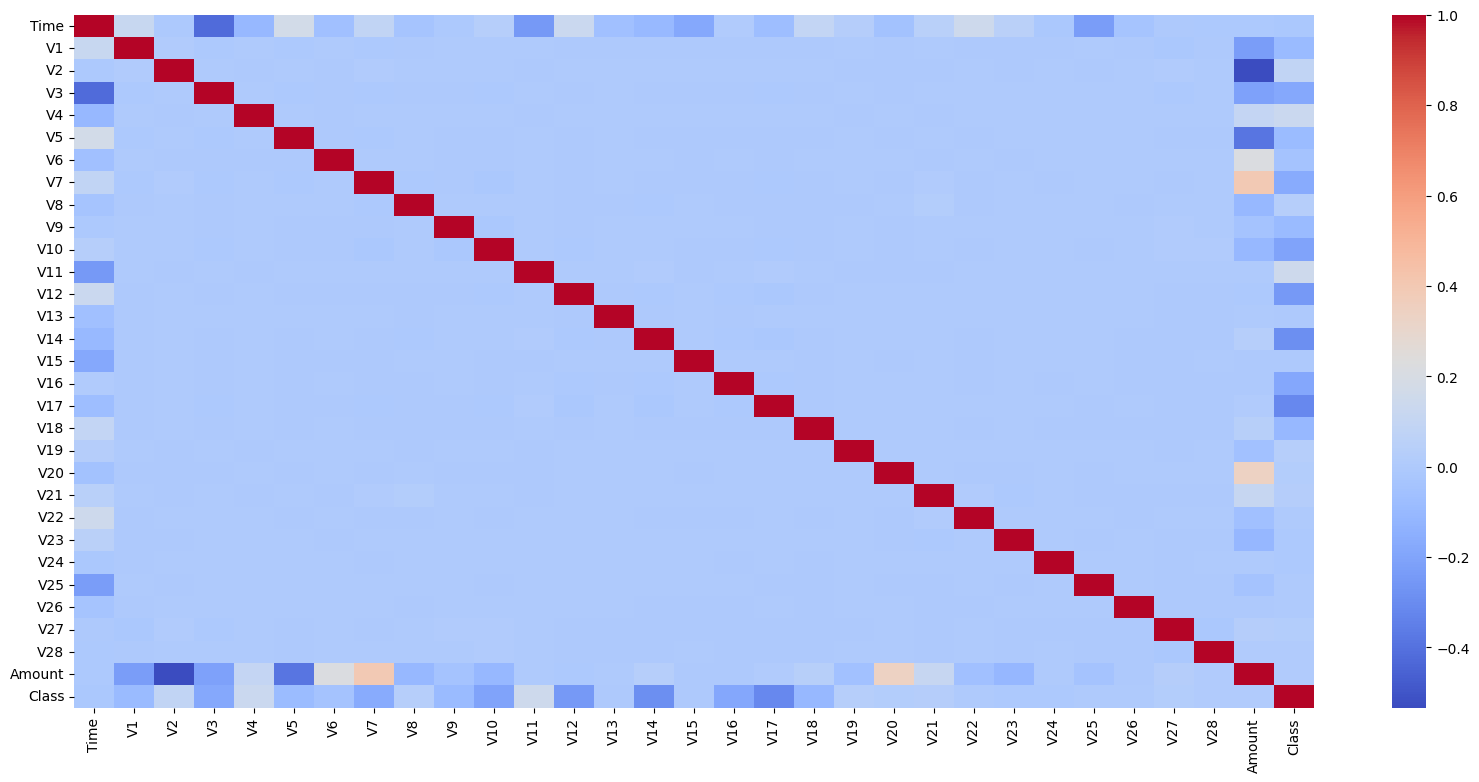

In [20]:
plt.figure(figsize = (20, 9))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

**DataVisualization**

<Figure size 800x600 with 0 Axes>

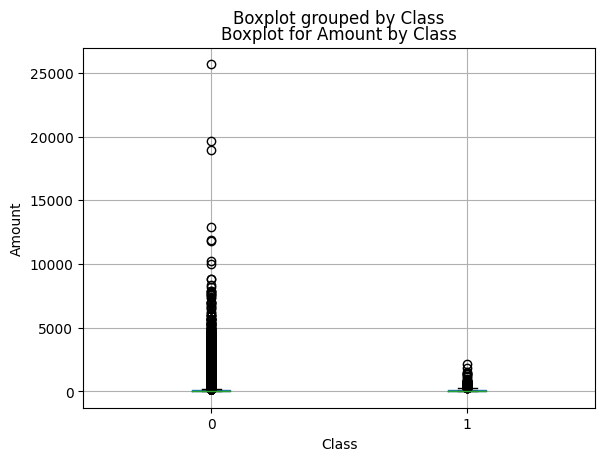

In [21]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Amount", by = "Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.title("Boxplot for Amount by Class")
plt.show()


<Figure size 800x600 with 0 Axes>

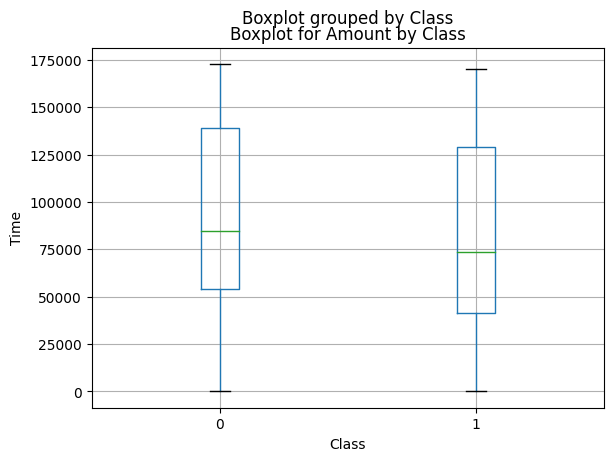

In [22]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Time", by = "Class")
plt.xlabel("Class")
plt.ylabel("Time")
plt.title("Boxplot for Amount by Class")
plt.show()

**Normalizing the dataset (Imbalance to balance dataset)**

In [23]:
x=df.drop(['Class'], axis=1)
y=df['Class']

In [24]:
#under sampling
from imblearn.under_sampling import NearMiss
model = NearMiss()
x_under, y_under = model.fit_resample(x,y)
x_under.shape, y_under.shape

((946, 30), (946,))

In [25]:
#over sampling
from imblearn.combine import SMOTETomek
model = SMOTETomek()
x_over, y_over = model.fit_resample(x,y)
x_over.shape, y_over.shape

((565422, 30), (565422,))

**Machine Learning**

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score

In [27]:
#Imbalance
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25)
#under sa,pling
x_train_under,x_test_under,y_train_under,y_test_under = train_test_split(x_under, y_under, test_size=0.25)
#over sampling
x_train_over,x_test_over,y_train_over,y_test_over = train_test_split(x_over, y_over, test_size=0.25)

In [36]:
x_train_under.shape,y_train_under.shape

((709, 30), (709,))

In [38]:
y_test_under.shape,x_test_under.shape

((237,), (237, 30))

In [28]:
#Imbalance
# XGBClassifier
model_1 = XGBClassifier().fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [29]:
#under sampling
# XGBClassifier
model_under_1 = XGBClassifier().fit(x_train_under, y_train_under)
y_pred_under_1 = model_under_1.predict(x_test_under)

In [30]:
#over sampling
# XGBClassifier
model_over_1 = XGBClassifier().fit(x_train_over, y_train_over)
y_pred_over_1 = model_over_1.predict(x_test_over)

In [32]:
# XGBClassifier
kas = top_k_accuracy_score(y_test, y_pred_1)
ps = precision_score(y_test, y_pred_1)
rs = recall_score(y_test, y_pred_1)
print( "XGBClassifier", "k_accuracy_score :", kas, "precision_score :", ps, "recall_score :", rs)

XGBClassifier k_accuracy_score : 1.0 precision_score : 0.9897959183673469 recall_score : 0.7698412698412699


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


In [39]:
#under sampling
# XGBClassifier
ps = precision_score(y_test_under, y_pred_under_1)
rs = recall_score(y_test_under, y_pred_under_1)
print( "XGBClassifier", "k_accuracy_score :", kas, "precision_score :", ps, "recall_score :", rs )

XGBClassifier k_accuracy_score : 1.0 precision_score : 0.9834710743801653 recall_score : 0.9596774193548387


In [40]:
#over sampling
# XGBClassifier
kas2 = top_k_accuracy_score(y_test_over, y_pred_over_1)
ps2 = precision_score(y_test_over, y_pred_over_1)
rs2 = recall_score(y_test_over, y_pred_over_1)
print( "XGBClassifier", "k_accuracy_score :", kas2, "precision_score :", ps2, "recall_score :", rs2 )

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  warnings.warn(


XGBClassifier k_accuracy_score : 1.0 precision_score : 0.9996315349404079 recall_score : 1.0
